In [18]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [19]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
pd.unique(df['diagnosis'])

array(['M', 'B'], dtype=object)

In [22]:
del df['id']
del df['Unnamed: 32']

In [23]:
X = df.loc[:, 'radius_mean':'fractal_dimension_worst']
y = df['diagnosis']

In [24]:
di = {'M': 1, 'B': 0}
y = y.map(di)
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Estandarizar los datos
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
# Ajustamos el svm
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train_std, y_train)
# Obtener la predicción
y_pred_svc = svc.predict(X_test_std)

# Ajustamos el Random Forest
rf = RandomForestClassifier(n_estimators=100)
rff = rf.fit(X_train_std, y_train)
# Obtener la predicción
y_pred_rf = rff.predict(X_test_std)

# Ajustamos el GradientBoosting
gb = GradientBoostingClassifier()
gbf = gb.fit(X_train_std, y_train)
# Obtener la predicción
y_pred_gb = gbf.predict(X_test_std)

# Ajustamos el GradientBoosting
knn = KNeighborsClassifier()
knnf = knn.fit(X_train_std, y_train)
# Obtener la predicción
y_pred_knn = knnf.predict(X_test_std)

# Ajustamos el GradientBoosting
dt = DecisionTreeClassifier()
dtf = dt.fit(X_train_std, y_train)
# Obtener la predicción
y_pred_dt = dtf.predict(X_test_std)

In [30]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_true=y_test, y_pred=y_pred_svc)
print('La matriz de confusión del SVC es: \n{}'.format(matriz))

matriz = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)
print('La matriz de confusión del RF es: \n{}'.format(matriz))

matriz = confusion_matrix(y_true=y_test, y_pred=y_pred_gb)
print('La matriz de confusión del GB es: \n{}'.format(matriz))

matriz = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

matriz = confusion_matrix(y_true=y_test, y_pred=y_pred_dt)
print('La matriz de confusión del DT es: \n{}'.format(matriz))

La matriz de confusión del SVC es: 
[[138   2]
 [  4  84]]
La matriz de confusión del RF es: 
[[134   6]
 [  5  83]]
La matriz de confusión del GB es: 
[[131   9]
 [  8  80]]
La matriz de confusión del KNN es: 
[[138   2]
 [ 10  78]]
La matriz de confusión del DT es: 
[[133   7]
 [  6  82]]


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
accuracy = accuracy_score(y_test, y_pred_svc)
print('La precisión es del SVC: {}'.format(precision))
print('El recall es del SVC: {}'.format(recall))
print('El f1-score es del SVC: {}'.format(f1))
print('La accuracy es del SVC: {}'.format(accuracy))

precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
print('La precisión es del RF: {}'.format(precision))
print('El recall es del RF: {}'.format(recall))
print('El f1-score es del RF: {}'.format(f1))
print('La accuracy es del RF: {}'.format(accuracy))

La precisión es del SVC: 0.9767441860465116
El recall es del SVC: 0.9545454545454546
El f1-score es del SVC: 0.9655172413793104
La accuracy es del SVC: 0.9736842105263158
La precisión es del RF: 0.9325842696629213
El recall es del RF: 0.9431818181818182
El f1-score es del RF: 0.9378531073446328
La accuracy es del RF: 0.9517543859649122


In [32]:
from sklearn.metrics import auc, roc_curve
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_pred_svc, pos_label=1)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf, pos_label=1)
fpr_gb, tpr_gb, thresholds = roc_curve(y_test, y_pred_gb, pos_label=1)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn, pos_label=1)
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt, pos_label=1)

In [33]:
print('El área bajo la curva es del SVC: {}'.format(auc(fpr_svc, tpr_svc)))
print('El área bajo la curva es del RF: {}'.format(auc(fpr_rf, tpr_rf)))
print('El área bajo la curva es del GB: {}'.format(auc(fpr_gb, tpr_gb)))
print('El área bajo la curva es del KNN: {}'.format(auc(fpr_knn, tpr_knn)))
print('El área bajo la curva es del DT: {}'.format(auc(fpr_dt, tpr_dt)))

El área bajo la curva es del SVC: 0.9701298701298702
El área bajo la curva es del RF: 0.9501623376623377
El área bajo la curva es del GB: 0.9224025974025974
El área bajo la curva es del KNN: 0.936038961038961
El área bajo la curva es del DT: 0.9409090909090908


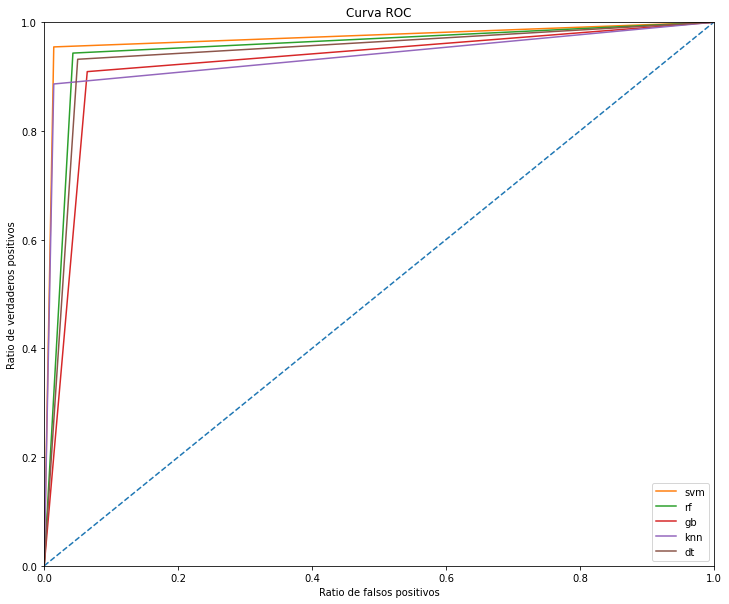

In [34]:
import matplotlib.pyplot as plt
# Crear figura
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Pintar la diagonal
ax.plot([0,1],[0,1],ls='--')

# Pintar los ejes
ax.set_xlabel('Ratio de falsos positivos')
ax.set_ylabel('Ratio de verdaderos positivos')
ax.set_title('Curva ROC')

# Delimitar los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Pintar la curva
ax.plot(fpr_svc, tpr_svc, label='svm')
ax.plot(fpr_rf, tpr_rf, label='rf')
ax.plot(fpr_gb, tpr_gb, label='gb')
ax.plot(fpr_knn, tpr_knn, label='knn')
ax.plot(fpr_dt, tpr_dt, label='dt')

# Mostrar plot
ax.legend(loc='lower right')
plt.show()